# Importing neccessary libraries

In [6]:
from xml.etree.ElementTree import parse
from pandas import DataFrame
import matplotlib.pyplot as plt
import os
%matplotlib inline

# Getting a list of all the files in the present working directory

In [2]:
path = "C:\Users\Ohm\Documents\Python Scripts\XML Parsing\generated-data"
dirs = os.listdir(path)

# Calculating Mean BP of each patient for the period 2004-2006

In [4]:
#Refer to the code "Plot - No. of encounters every week for a given patient" 
# and code "Plot - No. of encounters every week for a given patient"
#for more explaination to initial steps
mean_bp = []  #List to store all the mean blood pressures
for patient in dirs: #Iterating through all the patients
    filename = 'generated-data\\' + patient
    doc = parse(filename)

    encounter_dates = []
    
    for encounter in doc.findall('.//{http://hl7.org/fhir}Encounter'):
        period = encounter.find('{http://hl7.org/fhir}period')
        start_date = period.find('{http://hl7.org/fhir}start')
        encounter_dates.append(start_date.get('value'))
    
    if not encounter_dates: #Skip if the patient does not have any encounter"
        continue
    
    systolic_bps = []
    diastolic_bps = []
    
    for observation in doc.findall('.//{http://hl7.org/fhir}Observation'):
        text_ele = observation.find('{http://hl7.org/fhir}text')
        div = text_ele.find('{http://www.w3.org/1999/xhtml}div')
        if div.text.find('Systolic') != -1:
            value_quant = observation.find('{http://hl7.org/fhir}valueQuantity')
            value = value_quant.find('{http://hl7.org/fhir}value')
            systolic_bps.append(value.get('value'))
        if div.text.find('Diastolic') != -1:
            value_quant = observation.find('{http://hl7.org/fhir}valueQuantity')
            value = value_quant.find('{http://hl7.org/fhir}value')
            diastolic_bps.append(value.get('value'))
    
    if (not systolic_bps) & (not diastolic_bps): #Skip if his/her Systolic/Diastolic BP has never been observed
        continue
    
    enc_dict = {}
    enc_dict['encounter_date'] = encounter_dates
    enc_dict['systolic_bp'] = systolic_bps
    enc_dict['diastolic_bp'] = diastolic_bps
    
    encounters = DataFrame(enc_dict, columns=['encounter_date', 'diastolic_bp', 'systolic_bp'])
    encounters = encounters.convert_objects(convert_dates='coerce', convert_numeric=True)
    #Select patient's records during the period 2004-2006
    enc_period = encounters[(encounters.encounter_date.dt.year >= 2004) & (encounters.encounter_date.dt.year <= 2006)]
    if enc_period.empty: #Skip if no record exists for the period 2004-2006"
        continue
    
    #Calculate the mean blood pressure for each encounter during 2004-2006
    enc_period['mean_bp'] = enc_period['diastolic_bp'] + ((enc_period['systolic_bp']-enc_period['diastolic_bp'])/3)
    #Calculate the mean of all mean blood pressures
    mbp = enc_period['mean_bp'].mean()
    #Add the mean blood pressure of the patient during 2004-2006 to the list
    mean_bp.append(mbp)

C:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# Plot a histogram for the calculated mean blood pressures of all patients during the period 2004-2006

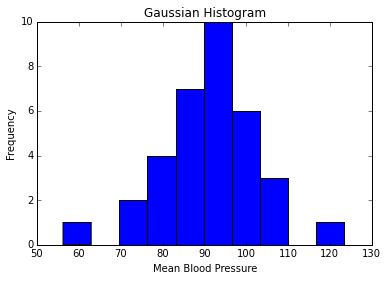

In [7]:
plt.hist(mean_bp, stacked=True)
plt.title("Gaussian Histogram")
plt.xlabel("Mean Blood Pressure")
plt.ylabel("Frequency")

fig = plt.gcf()